In [22]:
import PIL as pil
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

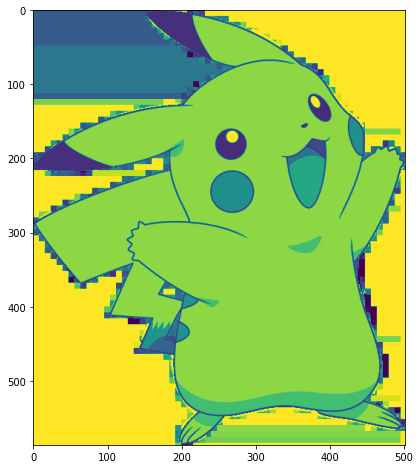

In [32]:
image = np.array(Image.open('pikachu.webp').convert('L'))

plt.figure(figsize=(8, 8))
plt.imshow(image)

In [33]:
kernel_v = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

kernel_h = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

pooled_image = np.zeros(image.shape)

w, h = image.shape

for x in range(w):
    for y in range(h):
        if x == 0 or x == w - 1 or y == 0 or y == h - 1:
            pooled_image[x, y] = image[x, y]
        else:
            pooled_image[x, y] = np.sum(image[x - 1:x + 2, y - 1:y + 2] * kernel_h)

pooled_image2 = np.zeros(image.shape)

w, h = image.shape

for x in range(w):
    for y in range(h):
        if x == 0 or x == w - 1 or y == 0 or y == h - 1:
            pooled_image2[x, y] = image[x, y]
        else:
            pooled_image2[x, y] = np.sum(image[x - 1:x + 2, y - 1:y + 2] * kernel_v)

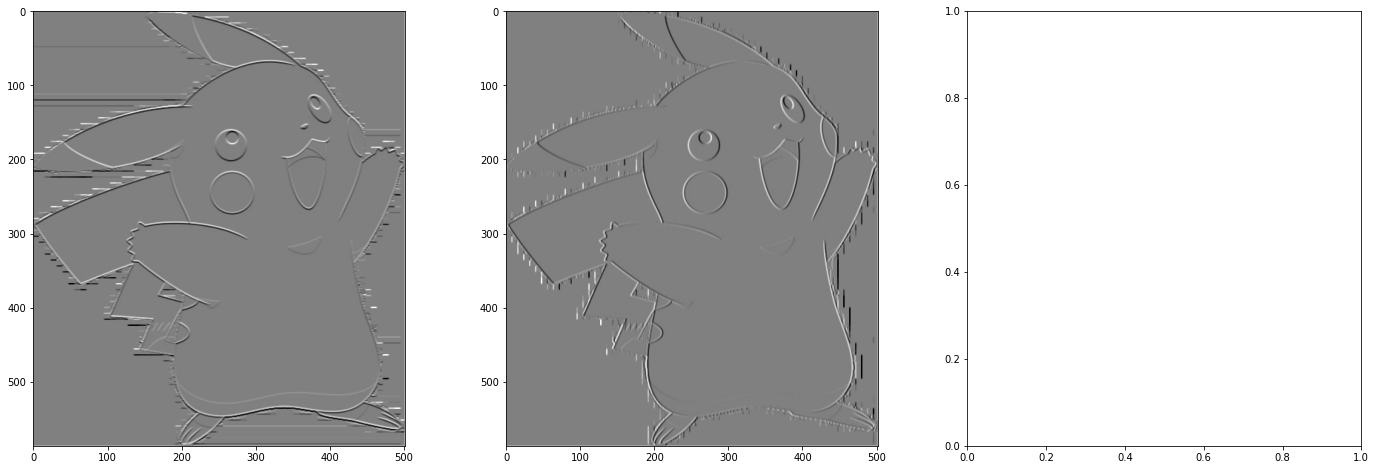

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(8 * 3, 8))

# 1Layer CNN 2 Filter 3x3 Kernel 1x1 Stride
ax[0].imshow(pooled_image, cmap='gray')
ax[1].imshow(pooled_image2, cmap='gray')

norm = np.linalg.norm(pooled_image - pooled_image2)
ax[0].imshow(pooled_image / norm, cmap='gray')
ax[1].imshow(pooled_image2 / norm, cmap='gray')


# # Max Pooling
# ax[2].imshow(np.maximum(pooled_image , pooled_image2), cmap='gray')
#
# ax[2].imshow((pooled_image + pooled_image2) / 2, cmap='gray')